In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import control as ct

In [43]:
fs = 10
g = 9.81

data = [np.genfromtxt(entry.path, delimiter='\t') 
        for entry in os.scandir("measurements") 
        if entry.is_file()]
data = np.stack(data, axis=0)
averaged = np.mean(data, axis=0)
averaged = np.delete(averaged, 0, 1)*g

In [67]:
data[0,:,1:].shape

(12001, 3)

In [65]:
averaged.shape

(12001, 3)

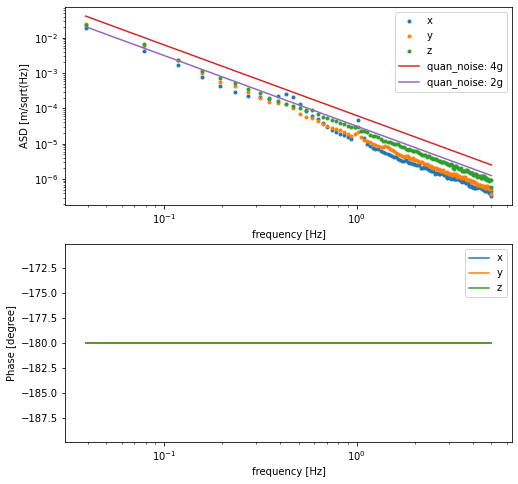

In [72]:
f, Pxx_den = signal.welch(averaged, fs, nperseg=256, axis=0)
Axx_den = np.sqrt(Pxx_den)
omega = 2*np.pi*f[1:]
mag, phase, *_ = ct.tf(1, [1, 0, 0]).frequency_response(omega)

quan_noise_2g = (4/2**12*g)**2/6/fs
quan_noise_4g = (8/2**12*g)**2/6/fs

f_xy, cohXY = signal.coherence(averaged[:,0], averaged[:,1], fs=fs, nperseg=256)


fig, (ax1, ax2) = plt.subplots(figsize=(8,8), nrows=2)

labels = ['x', 'y', 'z']
for i, label in enumerate(labels):
    ax1.loglog(f[1:], Axx_den[1:, i]*mag, '.',label=label)
ax1.loglog(f[1:], np.sqrt(quan_noise_4g)*mag, label='quan_noise: 4g')
ax1.loglog(f[1:], np.sqrt(quan_noise_2g)*mag, label='quan_noise: 2g')
ax1.set_ylabel('ASD [m/sqrt(Hz)]')
ax1.set_xlabel('frequency [Hz]')
ax1.legend()

for i, label in enumerate(labels):
    ax2.semilogx(f[1:], phase/np.pi*180, label=label)
ax2.set_ylabel('Phase [degree]')
ax2.set_xlabel('frequency [Hz]')
ax2.legend()
plt.show()

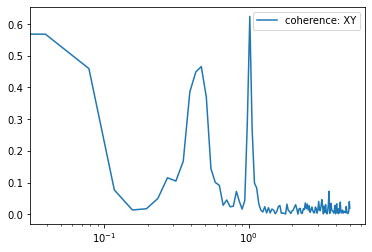

In [73]:
plt.semilogx(f_xy, cohXY, label='coherence: XY')
plt.legend()